In [728]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('particulars_of_first_registered_vehicle_nov_2019_eng.csv')

groupeddf = df.groupby(['Fuel Type','Vehicle Make']).count().reset_index()

#sns.lmplot(data=groupeddf,x="Vehicle Made", y="Vehicle Model")


#sns.scatterplot(data=groupeddf, x="Vehicle Made", y="Vehicle Model")
groupeddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Fuel Type                           94 non-null     object
 1   Vehicle Make                        94 non-null     object
 2   Vehicle Class                       94 non-null     int64 
 3   Vehicle Model                       94 non-null     int64 
 4   Cylinder Capacity Of Engine (c.c.)  94 non-null     int64 
 5   Body Type                           94 non-null     int64 
 6   First Registration Vehicle Status   94 non-null     int64 
 7   Permitted Gross Vehicle Weight      94 non-null     int64 
 8   Number Of Passenger Seats           94 non-null     int64 
 9   Taxable Value (HK$)                 94 non-null     int64 
 10  Year Of Manufacture                 94 non-null     int64 
dtypes: int64(9), object(2)
memory usage: 8.2+ KB


In [729]:
print(groupeddf['Vehicle Make'])

0     ALEXANDER DENNIS
1                  DAF
2             DONGFENG
3                 FORD
4                FOTON
            ...       
89                 TRS
90               VESPA
91          VOLKSWAGEN
92               VOLVO
93              YAMAHA
Name: Vehicle Make, Length: 94, dtype: object


<Axes: xlabel='Vehicle Make', ylabel='Count'>

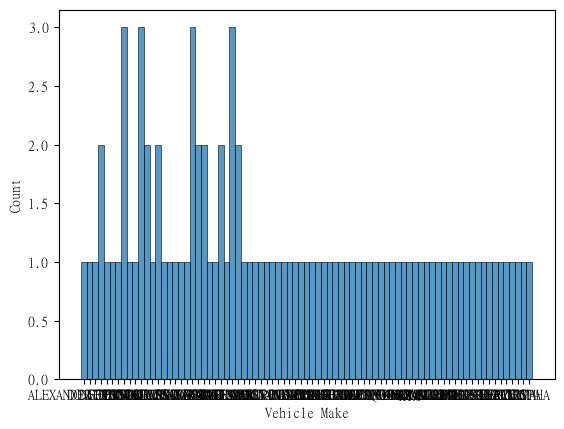

In [730]:
sns.histplot(data=groupeddf, x='Vehicle Make', multiple="dodge")

  Fuel Type  Vehicle Class  Vehicle Make  Vehicle Model  \
0    Diesel            715           715            715   
1  Electric            428           428            428   
2       LPG             93            93             93   
3    Petrol           3316          3316           3316   

   Cylinder Capacity Of Engine (c.c.)  Body Type  \
0                                 715        715   
1                                 428        428   
2                                  93         93   
3                                3316       3316   

   First Registration Vehicle Status  Permitted Gross Vehicle Weight   \
0                                715                              715   
1                                428                              428   
2                                 93                               93   
3                               3316                             3316   

   Number Of Passenger Seats   Taxable Value (HK$)  Year Of Manufacture  
0  

([0, 1, 2, 3],
 [Text(0, 0, 'Diesel'),
  Text(1, 0, 'Electric'),
  Text(2, 0, 'LPG'),
  Text(3, 0, 'Petrol')])

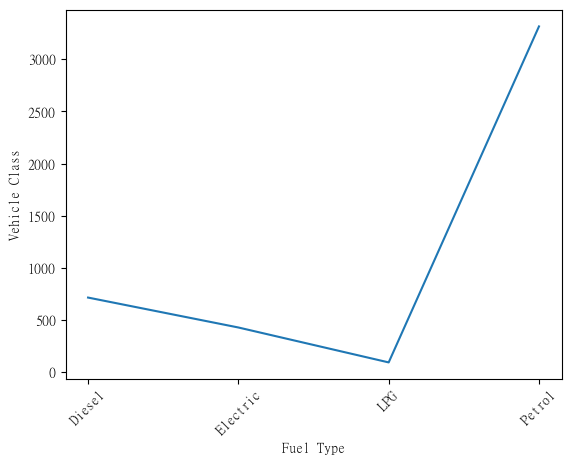

In [731]:
groupeddf2= df.groupby('Fuel Type').count().reset_index()
print(groupeddf2)
sns.lineplot(data=groupeddf2,x='Fuel Type',y='Vehicle Class')
plt.xticks(rotation=45)

<Axes: xlabel='Fuel Type', ylabel='Count'>

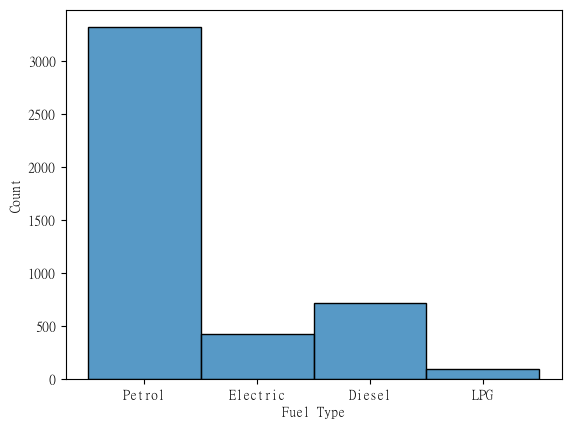

In [732]:
df = pd.read_csv('particulars_of_first_registered_vehicle_nov_2019_eng.csv')
#groupeddf2= df.groupby('Fuel Type')
sns.histplot(data=df, x='Fuel Type')

In [733]:
df = pd.read_csv('particulars_of_first_registered_vehicle_jul_2024_eng.csv')
groupeddf2= df.groupby('Fuel Type').count().reset_index()
#sns.histplot(data=df, x='Fuel Type')
df3 = groupeddf2[['Fuel Type','Vehicle Make']].copy()
df3.rename(columns={'Vehicle Make': 'Count'}, inplace=True)
df3['Date']='2024'

df3


,Fuel Type,Count,Date
0,Diesel,288,2024
1,Electric,1743,2024
2,LPG,89,2024
3,Petrol,1522,2024


In [734]:
# create an empty dataframe 
master_df  = pd.DataFrame() 

with open('filelistcsv.txt', 'r') as file:
    line = file.readline()
    while line:

        line = file.readline()
        #print(line, end='')  # Print each line
        if line.strip() == '':
            break
        filename = line.split()[4]
        #print(filename) # get the last part as filename
        monthdate = ''.join(filename.split('_')[5:7])
        #print(monthdate)
        df = pd.read_csv(filename)
        groupeddf2= df.groupby('Fuel Type').count().reset_index()
        #sns.histplot(data=df, x='Fuel Type')
        df3 = groupeddf2[['Fuel Type','Vehicle Make']].copy()
        df3.rename(columns={'Vehicle Make': 'Count'}, inplace=True)
        df3['Date']=monthdate
        master_df=pd.concat([master_df,df3])

master_df.index = pd.to_datetime(master_df['Date'],format = '%b%Y')
master_df.sort_index
print(master_df)





           Fuel Type  Count     Date
Date                                
2021-04-01    Diesel    614  apr2021
2021-04-01  Electric    629  apr2021
2021-04-01       LPG    118  apr2021
2021-04-01    Petrol   3300  apr2021
2022-04-01    Diesel    538  apr2022
...              ...    ...      ...
2022-09-01    Petrol   2301  sep2022
2023-09-01    Diesel    353  sep2023
2023-09-01  Electric   2288  sep2023
2023-09-01       LPG    112  sep2023
2023-09-01    Petrol   1533  sep2023

[229 rows x 3 columns]


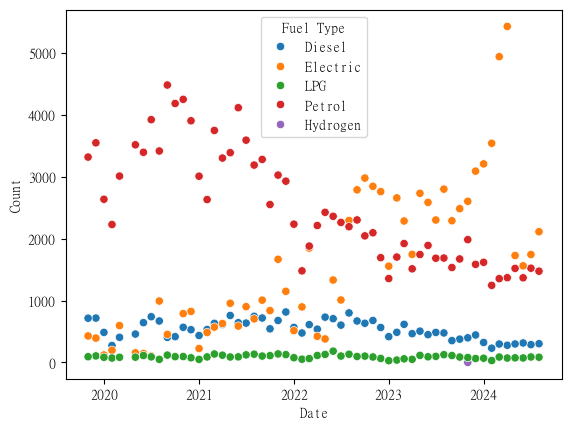

In [735]:
sns.scatterplot(data=master_df, x= master_df.index, y='Count', hue='Fuel Type')
plt.show()

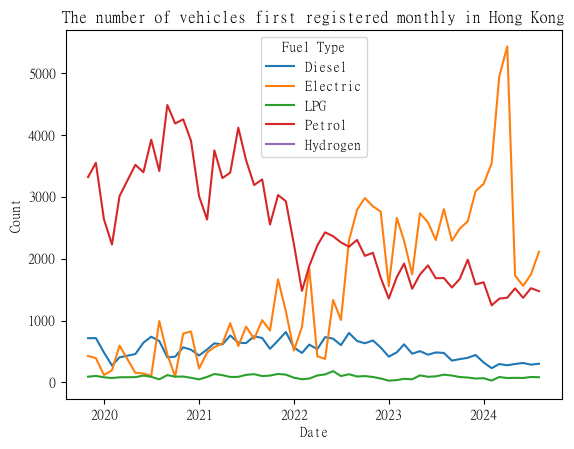

In [759]:
sns.lineplot(data=master_df, x= master_df.index, y='Count',hue = 'Fuel Type')
plt.title('The number of vehicles first registered monthly in Hong Kong')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_21008\485650876.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_electric.drop(columns = ['Date', 'Fuel Type'],inplace =True)
C:\Users\User\AppData\Local\Temp\ipykernel_21008\485650876.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_electric.sort_index(inplace = True)


                               SARIMAX Results                                
Dep. Variable:                  Count   No. Observations:                   57
Model:                 ARIMA(4, 1, 1)   Log Likelihood                -444.782
Date:                Fri, 18 Oct 2024   AIC                            901.564
Time:                        11:03:05   BIC                            913.716
Sample:                    11-30-2019   HQIC                           906.276
                         - 08-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4325      0.341      1.269      0.205      -0.236       1.101
ar.L2         -0.2364      0.217     -1.091      0.275      -0.661       0.188
ar.L3          0.1142      0.249      0.458      0.6

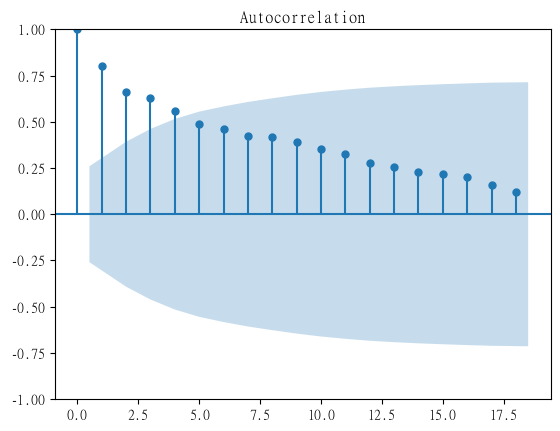

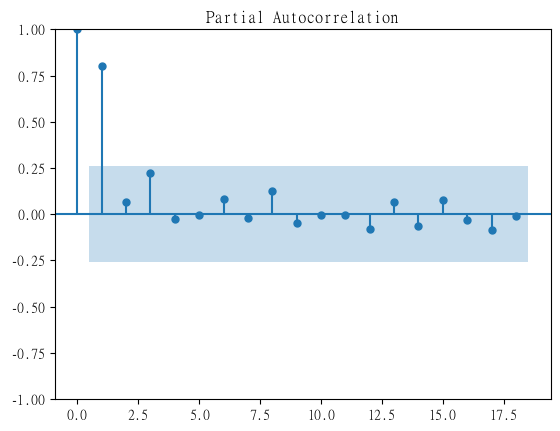

In [737]:
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.arima.model import ARIMA
df_electric = master_df[master_df['Fuel Type']=='Electric']
df_electric.drop(columns = ['Date', 'Fuel Type'],inplace =True)
df_electric.index = pd.to_datetime( df_electric.index, format = '%Y-%m')
df_electric.index = df_electric.index.to_period('M')
df_electric.sort_index(inplace = True)
df_electric
plot_acf(df_electric)
plot_pacf(df_electric, method='ywm')

model = ARIMA(df_electric, order=(4,1,1))
model_fit = model.fit()
print(model_fit.summary())


In [738]:
df_electric

,Count
Date,
2019-11,428
2019-12,394
2020-01,121
2020-02,197
2020-03,596
2020-05,156
2020-06,145
2020-07,106
2020-08,992


In [739]:
from statsmodels.tsa.stattools import adfuller

#perform augmented Dickey-Fuller test
adfuller(df_electric)

(np.float64(-2.4698314667204406),
 np.float64(0.12298824686424009),
 0,
 56,
 {'1%': np.float64(-3.552928203580539),
  '5%': np.float64(-2.9147306250000002),
  '10%': np.float64(-2.595137155612245)},
 np.float64(728.1693623737733))

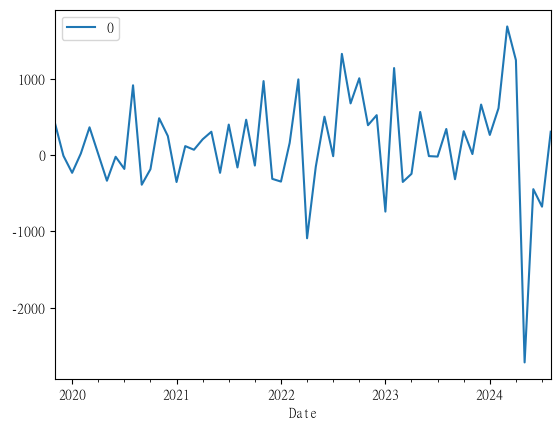

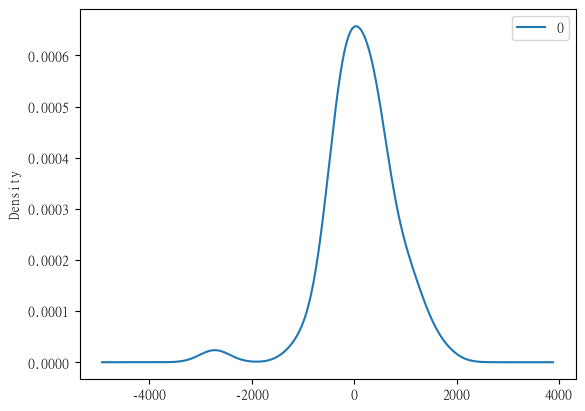

In [740]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()

In [741]:
print(residuals.describe())

                 0
count    57.000000
mean    138.636593
std     665.361677
min   -2717.843050
25%    -234.754725
50%     115.137937
75%     480.000585
max    1682.678552


In [742]:
X = df_electric.values
size = int(len(X) * 0.80)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

In [743]:
for t in range(len(test)):
 model = ARIMA(history, order=(4,1,1))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))

C:\Users\User\AppData\Local\Temp\ipykernel_21008\3140834947.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('predicted=%f, expected=%f' % (yhat, obs))


predicted=2611.704388, expected=2288.000000
predicted=2276.921791, expected=2483.000000
predicted=2611.213492, expected=2602.000000
predicted=2403.320959, expected=3089.000000
predicted=2869.941207, expected=3206.000000
predicted=2992.404588, expected=3539.000000
predicted=3382.018271, expected=4937.000000
predicted=4494.378913, expected=5425.000000
predicted=5206.601033, expected=1727.000000
predicted=2713.161757, expected=1560.000000
predicted=3009.502158, expected=1743.000000
predicted=1522.970543, expected=2111.000000


In [744]:
def forecast_2024_to_2035(df_electric):
    # get last expected
    last_observed_value = df_electric.iloc[-1, 0]
    
    # set up the time ragne
    date_range = pd.date_range(start='2024-10-01', end='2035-01-01', freq='MS')
    
    # # reset data 
    history = df_electric.values.flatten().tolist()
    
    forecasts = []
    
    for _ in range(len(date_range)):
        # use ARIMA < ML
        model = ARIMA(history, order=(4,1,1))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        
        # expected append to yhat
        forecasts.append(yhat)
        
        # use the new expected to be are>"predicted"
        history.append(yhat)
    
    # set up DataFrame have Date and Forecast
    result_df = pd.DataFrame({
        'Date': date_range,
        'Forecast': forecasts
    })
    
    return result_df

# use df_electric data to predicted
forecasts = forecast_2024_to_2035(df_electric)

forecasts.index = pd.to_datetime(forecasts['Date'], format = '%Y-%m')


Test RMSE: 1281.289


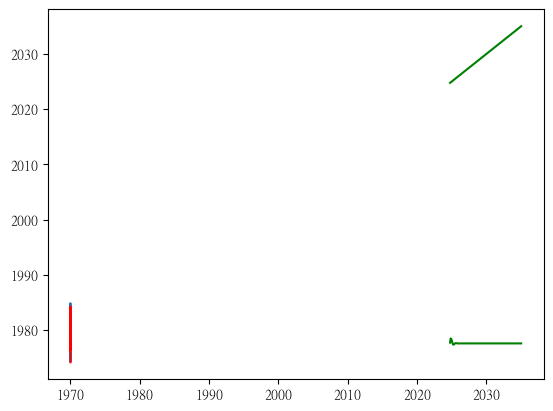

In [745]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
plt.plot(test)
plt.plot(predictions, color='red')
plt.plot(forecasts, color ='green')
plt.show()

Test RMSE: 1240.924


TypeError: float() argument must be a string or a number, not 'Period'

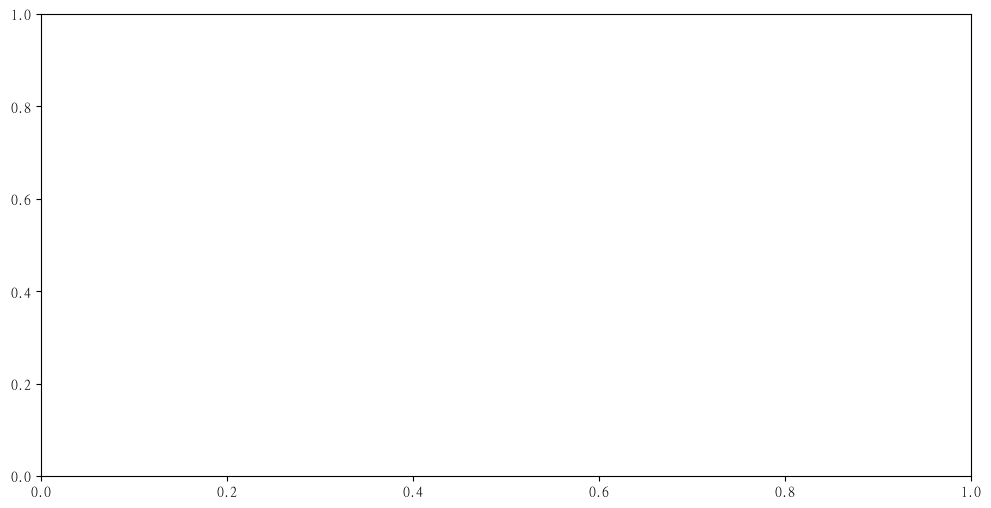

In [746]:
from math import sqrt
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

split_point = int(len(df_electric) * 0.8)

train = df_electric.iloc[:split_point]
test = df_electric.iloc[split_point:]


forecasts = forecast_2024_to_2035(train)

predictions = forecasts['Forecast'][:len(test)]

# RMSE
rmse = sqrt(mean_squared_error(test.values.flatten(), predictions))
print('Test RMSE: %.3f' % rmse)

# 圖
plt.figure(figsize=(12, 6))
plt.plot(test.index, test.values, label='Actual')
plt.plot(test.index, predictions, color='red', label='Predicted')
plt.title('Actual vs Predicted Electric Vehicle Registrations')
plt.xlabel('Date')
plt.ylabel('Number of Registrations')
plt.legend()
plt.show()

# 預測
plt.figure(figsize=(12, 6))
plt.plot(df_electric.index, df_electric.values, label='Historical Data')
plt.plot(forecasts['Date'], forecasts['Forecast'], color='red', label='Future Forecast')
plt.title('Electric Vehicle Registrations: Historical Data and Future Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Registrations')
plt.legend()
plt.show()

In [651]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   56
Model:                 ARIMA(4, 1, 1)   Log Likelihood                -437.149
Date:                Thu, 17 Oct 2024   AIC                            886.297
Time:                        15:07:43   BIC                            898.341
Sample:                             0   HQIC                           890.955
                                 - 56                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4682      0.350      1.336      0.181      -0.218       1.155
ar.L2         -0.2281      0.222     -1.026      0.305      -0.664       0.208
ar.L3          0.1806      0.291      0.621      0.5

In [652]:
ffv= master_df.groupby(master_df['Date']).count()
ffv

,Fuel Type,Count
Date,,
apr2021,4,4
apr2022,4,4
apr2023,4,4
apr2024,4,4
aug2020,4,4
aug2021,4,4
aug2022,4,4
aug2023,4,4
aug2024,4,4


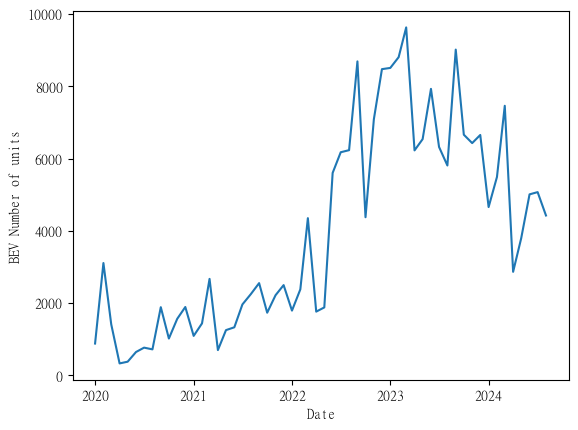

In [653]:
df_jp = pd.read_excel('EV_share_of_japan_market.xlsx')
df_jp.index = pd.to_datetime(df_jp['Date'],format = '%b%Y')
sns.lineplot(data=df_jp, x= df_jp.index, y='BEV Number of units')
plt.show()

In [654]:
df_jp

,Date,BEV Number of units,BEV Share,PHEV Number of units,PHEV Share,BEV+PHEV Number of units,BEV+PHEV Share,All Number of units
Date,,,,,,,,
2024-08-01,2024-08-01,4425,0.0163,2647,0.0098,7072,0.0261,271468
2024-07-01,2024-07-01,5072,0.0150,3683,0.0109,8755,0.0258,338704
2024-06-01,2024-06-01,5010,0.0161,2650,0.0085,7660,0.0246,311904
2024-05-01,2024-05-01,3795,0.0145,2505,0.0096,6300,0.0241,261327
2024-04-01,2024-04-01,2866,0.0111,3040,0.0117,5906,0.0228,258762
2024-03-01,2024-03-01,7462,0.0194,5353,0.0139,12815,0.0334,384161
2024-02-01,2024-02-01,5491,0.0184,4622,0.0155,10113,0.0339,298491
2024-01-01,2024-01-01,4658,0.0163,3410,0.0119,8068,0.0283,285431
2023-12-01,2023-12-01,6654,0.0221,3607,0.0120,10261,0.0340,301571


<Axes: xlabel='Date', ylabel='BEV Number of units'>

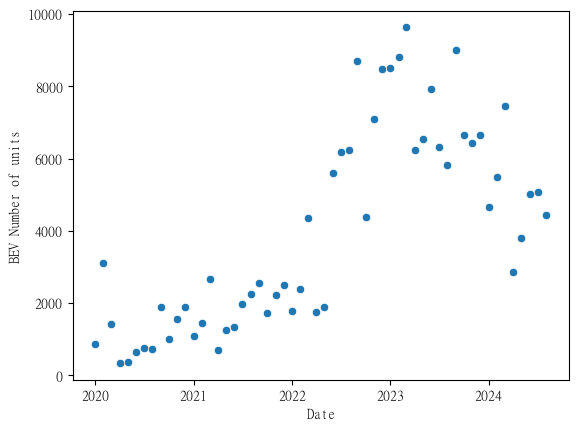

In [655]:
sns.scatterplot(data=df_jp, x= df_jp.index, y='BEV Number of units')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31 entries, 2022-01-01 to 2024-07-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          31 non-null     object 
 1   sales('0000)  31 non-null     float64
dtypes: float64(1), object(1)
memory usage: 744.0+ bytes


<Axes: xlabel='date'>

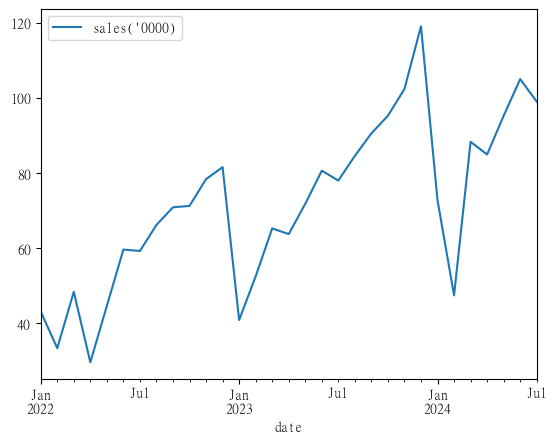

In [656]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import haversine
china_EV_sales = pd.read_csv('china_data_EV_monthly.csv')
china_EV_sales.head()
china_EV_sales.set_index('date')
china_EV_sales.index = pd.to_datetime(china_EV_sales['date'],format = '%Y-%m')
china_EV_sales.head()
china_EV_sales.info() 
china_EV_sales.plot()

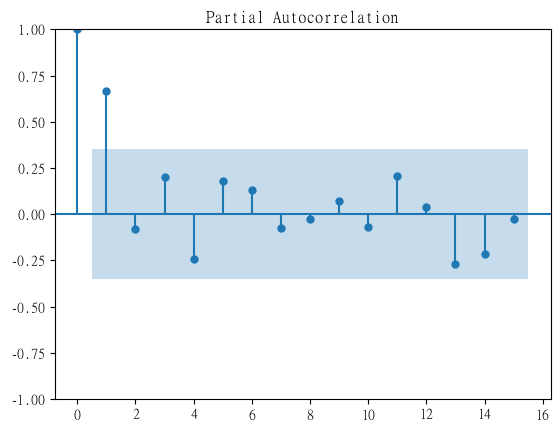

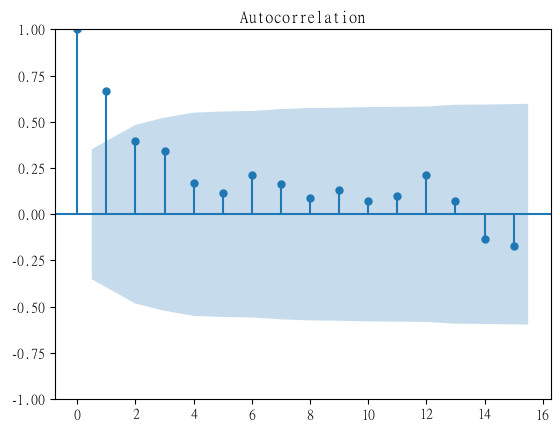

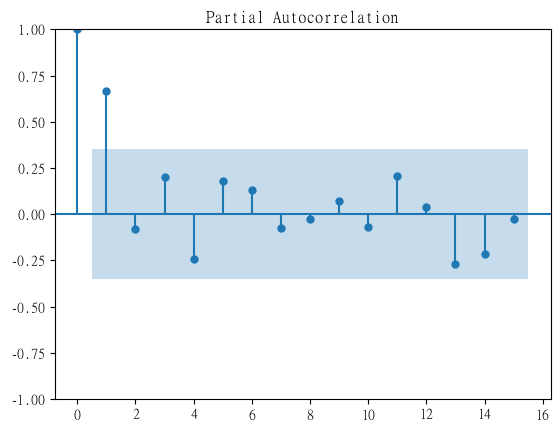

In [670]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
plot_acf(china_EV_sales["sales(\'0000)"])
plot_pacf(china_EV_sales["sales(\'0000)"])

In [671]:
# to predict future results and make train and test data sets
X = china_EV_sales["sales(\'0000)"].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
 model = ARIMA(history, order=(1,1,1))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))

predicted=82.090995, expected=90.643400
predicted=88.145980, expected=95.335100
predicted=93.356080, expected=102.466000
predicted=100.237147, expected=119.169000
predicted=115.510350, expected=72.815000
predicted=88.106676, expected=47.479900
predicted=50.745590, expected=88.391400
predicted=85.230205, expected=85.013400
predicted=83.762324, expected=95.335100
predicted=90.713897, expected=105.094000
predicted=98.470529, expected=99.088500


Test RMSE: 22.958


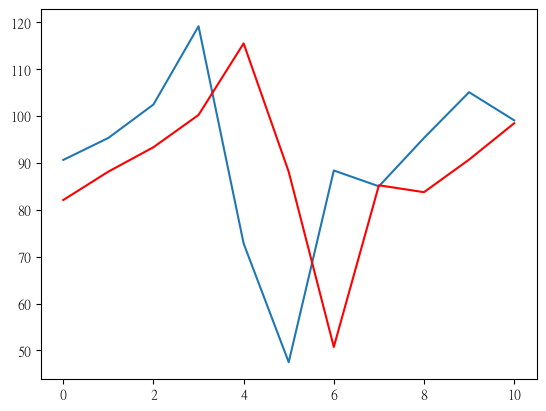

In [673]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [657]:
china_EV_sales.head()

,date,sales('0000)
date,,
2022-01-01,2022-01,43.1635
2022-02-01,2022-02,33.4048
2022-03-01,2022-03,48.4182
2022-04-01,2022-04,29.6515
2022-05-01,2022-05,44.6649


In [658]:
taipei_total= pd.read_csv('臺北市機動車輛登記數按使用燃料別分類.csv')
taipei_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13104 entries, 0 to 13103
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   資料年月    13104 non-null  int64 
 1   縣市      13104 non-null  object
 2   燃料別     13104 non-null  object
 3   車種類別    13104 non-null  object
 4   數量      13104 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 512.0+ KB


In [659]:
taipei_total.head()
taipei_total.rename(columns={'資料年月':'Year','縣市':'City','燃料別':'Fuel Type','車種類別':'Car Type', '數量':'Count'}, inplace = True)

In [660]:
taipei_total.index = pd.to_datetime(taipei_total['Year'],format = '%Y%m')

<Axes: xlabel='Year', ylabel='Count'>

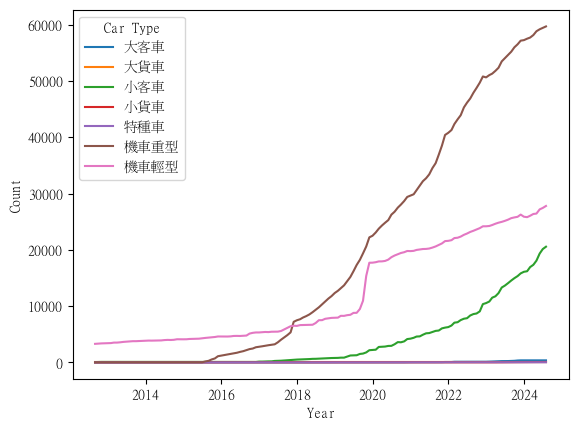

In [661]:
from matplotlib import font_manager
import matplotlib
fontP = font_manager.FontProperties(family='Microsoft JhengHei', size=14)
matplotlib.rcParams['font.family'] = 'MingLiu'
fontP.set_size(14)
taipei_electric_only = taipei_total[(taipei_total['Fuel Type'] == '電能')]
sns.lineplot(data = taipei_electric_only, x = taipei_electric_only.index, y = 'Count', hue = 'Car Type')

In [662]:
taipei_electric_only_small_car = taipei_electric_only[taipei_electric_only['Car Type']=='小客車']
taipei_electric_only_small_car=taipei_electric_only_small_car[taipei_electric_only_small_car['Year']>202001]

In [663]:
taipei_sales= pd.read_csv('臺北市新車領牌數按使用燃料別分類.csv')
taipei_sales
taipei_sales.rename(columns={'資料年月':'Year','縣市':'City','燃料別':'Fuel Type','車種類別':'Car Type', '數量':'Count'}, inplace = True)
taipei_sales

,Year,City,Fuel Type,Car Type,Count
0,201801,臺北市,汽油,大客車,0
1,201801,臺北市,汽油,大貨車,0
2,201801,臺北市,汽油,小客車,6384
3,201801,臺北市,汽油,小貨車,273
4,201801,臺北市,汽油,特種車,11
...,...,...,...,...,...
7275,202408,臺北市,總計,小客車,752131
7276,202408,臺北市,總計,小貨車,64868
7277,202408,臺北市,總計,特種車,9548
7278,202408,臺北市,總計,機車重型,880503


In [664]:
taipei_sales_electric = taipei_sales[(taipei_sales['Fuel Type']=='電能')&(taipei_sales['Year']<202406)&(taipei_sales['Year']>201911)]
taipei_sales_electric_small = taipei_sales_electric[taipei_sales_electric['Car Type']=='小客車']
taipei_sales_electric_small.index = pd.to_datetime(taipei_sales_electric_small['Year'], format = '%Y%m')

C:\Users\User\AppData\Local\Temp\ipykernel_21008\2295575450.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_electric_plot.sort_index(inplace = True)


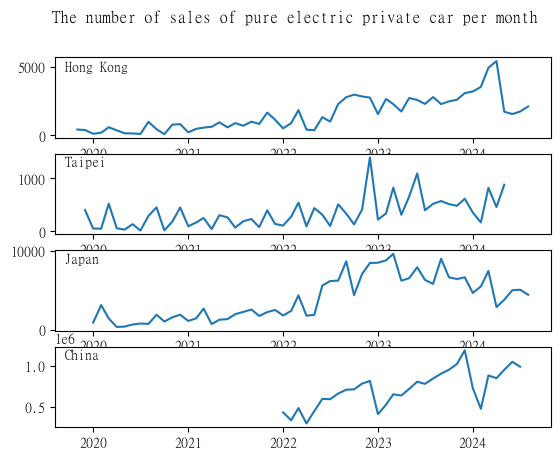

In [762]:
import matplotlib.pyplot as plt


df_electric_plot = master_df[master_df['Fuel Type']=='Electric']
df_electric_plot.sort_index(inplace = True)
ax1 = plt.subplot(411)
ax1.set_title('Hong Kong', loc='left', y=0.75, x=0.02, fontsize='medium')
plt.plot(df_electric_plot.index, df_electric_plot['Count'])
plt.suptitle('The number of sales of pure electric private car per month')
ax2= plt.subplot(412,sharex=ax1)
ax2.set_title('Taipei', loc='left', y=0.75, x=0.02, fontsize='medium')
plt.plot(taipei_sales_electric_small.index, taipei_sales_electric_small['Count'])
ax3= plt.subplot(413,sharex=ax1)
ax3.set_title('Japan', loc='left', y=0.75, x=0.02, fontsize='medium')
plt.plot(df_jp.index, df_jp['BEV Number of units'])
ax4= plt.subplot(414,sharex=ax1)
ax4.set_title('China', loc='left', y=0.75, x=0.02, fontsize='medium')
plt.plot(china_EV_sales.index, china_EV_sales["sales('0000)"]*10000)
plt.show()

            YearMonth  Standard  Medium  (≦20kW)  Quick (>20kW)  Total
YearMonth                                                             
2020-03-01     202003      1264             1113            591   2968
2020-06-01     202006      1248             1262            615   3125
2020-09-01     202009      1293             1301            625   3219
2020-12-01     202012      1252             1456            643   3351
2021-03-01     202103      1403             2016            684   4103
2021-06-01     202106      1460             2200            702   4362
2021-09-01     202109      1452             2408            779   4639
2021-12-01     202112      1420             2465            809   4694
2022-03-01     202203      1424             2571            857   4852
2022-06-01     202206      1423             2746            877   5046
2022-09-01     202209      1451             2871            961   5283
2022-12-01     202212      1453             2983            998   5434
2023-0

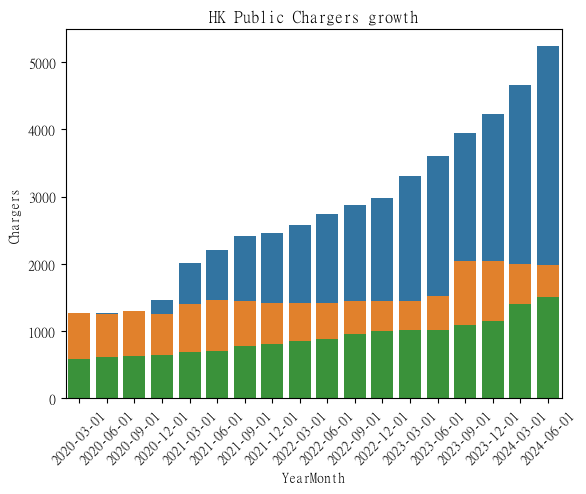

In [758]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px

df = pd.read_csv('hk_ev_charger_summary.csv')

df.index = pd.to_datetime(df['YearMonth'],format = '%Y%m')
df.sort_index
print(df)
sns.barplot(data=df, x= df.index, y=df['Medium  (≦20kW)'])
sns.barplot(data=df, x= df.index, y=df['Standard'])
sns.barplot(data=df, x= df.index, y=df['Quick (>20kW)'])
plt.xticks(rotation=45)
plt.title('HK Public Chargers growth')
plt.ylabel('Chargers' )
plt.show()
#df.head()